# **Wordmap Current Status:**
- Graph of clustered word embeddings with hoverover text popup
- Using spaCy to parse and tokenize text.
- Using spaCy to get word vectors/embeddings for each of the unique words in my text.
- Clustering is performed on the word vectors using Kmeans clustering to "classify" the words.
    - "Similar" words have the same color.


# **Bash, Git, and Python**
- The first few weeks of the internship (or more...) were used to learn Bash, Git, and get familiar with Python and its nuances.
-[My Bash notes on Gitlab](https://gitlab.com/tangibleai/team/-/tree/master/learning-resources/bash)
- [My Git notes]() 
- [My Python notes]()

# **Regex**
- [My Regex notes]()
- Then I spent some time learning regular expressions and improving the regex in glossary.py skill for qary.

# **spaCy api -- Architecture**
- [spaCy api link](https://spacy.io/api)

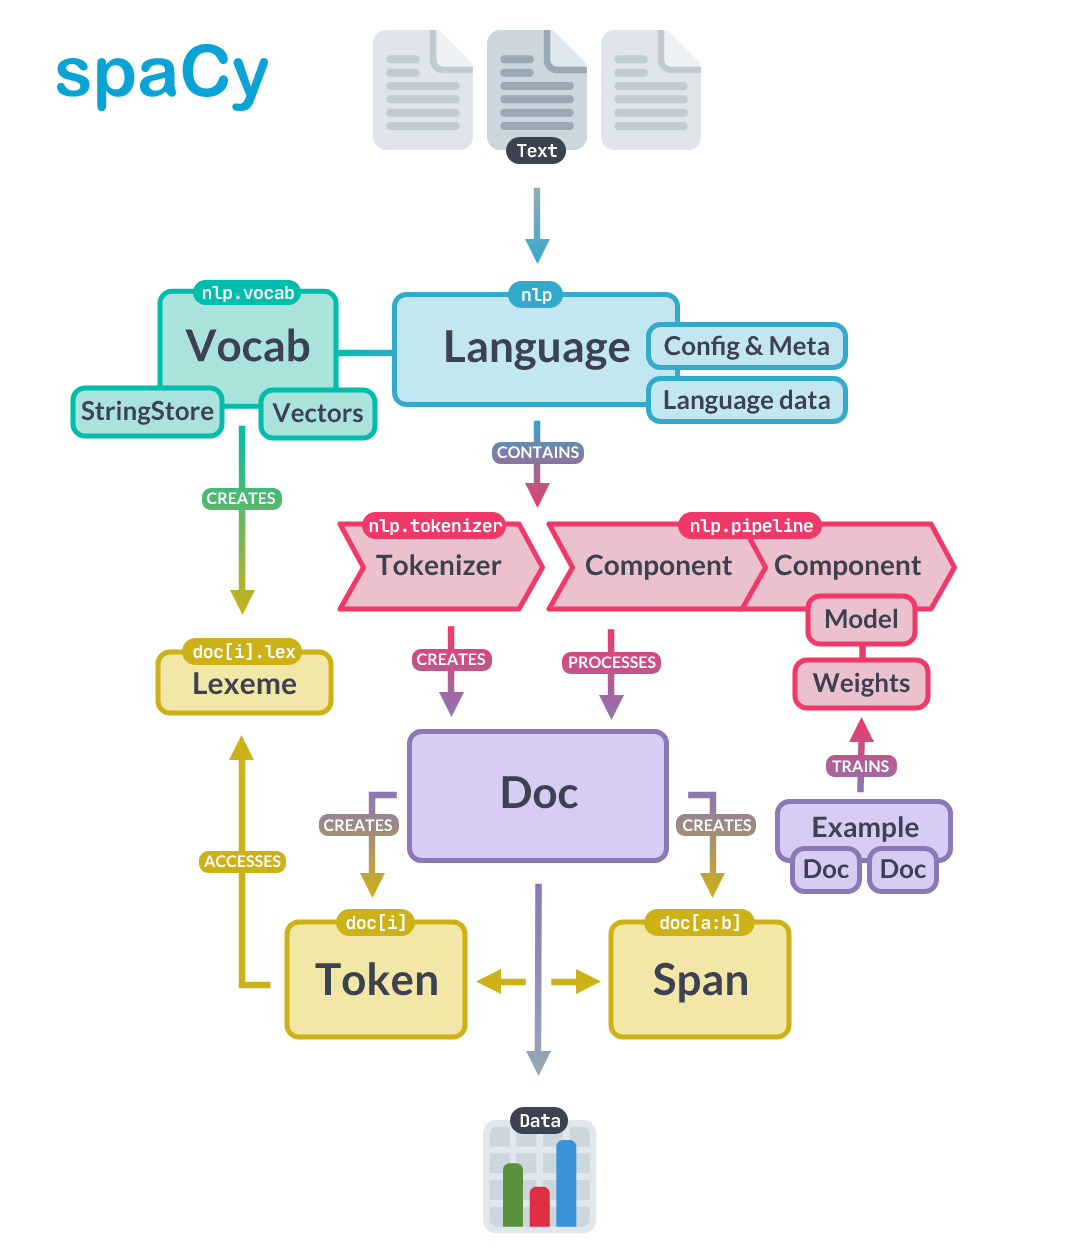

# **spaCy api -- nlp object**

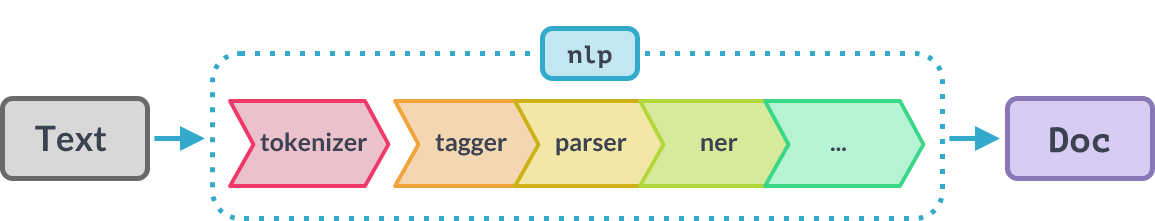

In [1]:
import spacy # for parsing text and word embeddings
import pandas as pd # for DataFrame data structure
import numpy as np # for numpy.array data structure
import matplotlib.pyplot as plt # for scatter plot
import mpld3 # adds interactivity to the scatter plot
from sklearn.cluster import KMeans # unsupervised learning K-means model to cluster word embeddings
from openTSNE import TSNE # for dimensionality reduction of the 300 dimension word embeddings to 2 dimensions

In [2]:
# English core web medium model
#nlp = spacy.load('en_core_web_md')

# English core web large model
nlp = spacy.load('en_core_web_lg')

In [3]:
text = open('first_aid_biochem_metabolism.txt', 'r').read()

In [4]:
# spaCy
doc = nlp(text)

In [5]:
words = [] # strings of the tokens

for token in doc:
    if token.is_alpha:
        words.append(token.text)

# Create a sorted list of unique words with set()
words = sorted(set(words))
print(len(words))
#print(words)

291


In [6]:
# Create Token objects of the words list to create word vectors/embeddings
tokens = []
for word in words:
    tokens.append(nlp(word)[0])
    
print(len(tokens))
#print(tokens)

291


In [7]:
# Create word vectors/embeddings from the Token objects
vectors = []
for token in tokens:
    vectors.append(token.vector)

In [8]:
# cast the vector list to a numpy array to use in the DataFrame
vectors = np.array(vectors)

In [9]:
tsne = TSNE(
    perplexity=50,
    #metric="cosine",
    verbose=True,
    n_jobs=-2,
    random_state=42,
    dof=0.5
)

In [10]:
embeddings = tsne.fit(vectors)

--------------------------------------------------------------------------------
TSNE(dof=0.5, n_jobs=-2, perplexity=50, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.08 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.12 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 2.2633, 50 iterations in 1.3415 sec
Iteration  100, KL divergence 1.6944, 50 iterations in 1.0965 sec
Iteration  150, KL divergence 1.7338, 50 iterations in 1.2014 sec
Iteration  200, KL divergence 1.8107, 50 iterations in 1.0579 sec
Iteration  250, KL divergence 1.9149, 50 iterations in 1.1503 sec
   --> Time elapsed: 5.85 seconds
===> Running optimization with exaggeration=1.00, lr=20

## K-means
[K-means example reference](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)

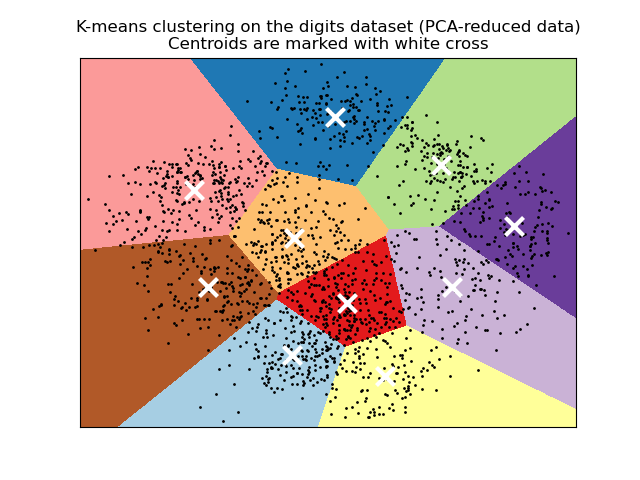

In [11]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(embeddings)

KMeans()

In [12]:
# y = kmeans.predict(df.values)
y = kmeans.predict(embeddings)
y

array([2, 0, 0, 0, 7, 0, 6, 2, 0, 7, 0, 0, 0, 0, 4, 0, 0, 5, 3, 0, 6, 0,
       0, 0, 6, 1, 0, 0, 0, 0, 6, 3, 1, 3, 7, 0, 6, 0, 0, 0, 4, 2, 3, 6,
       2, 5, 0, 0, 1, 0, 2, 0, 6, 6, 6, 6, 0, 6, 3, 5, 2, 0, 6, 0, 2, 1,
       0, 1, 1, 1, 5, 0, 0, 6, 0, 2, 6, 3, 0, 7, 0, 2, 0, 0, 5, 5, 7, 7,
       2, 6, 5, 2, 0, 7, 0, 0, 2, 2, 0, 3, 7, 6, 2, 7, 0, 1, 3, 7, 0, 1,
       2, 2, 1, 0, 0, 2, 2, 4, 1, 2, 5, 5, 2, 0, 2, 0, 2, 3, 7, 5, 5, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 4, 4, 0, 3, 1, 4, 3, 7, 0, 1, 3, 0,
       7, 0, 3, 3, 0, 0, 1, 5, 0, 0, 2, 2, 2, 2, 2, 7, 1, 1, 2, 2, 2, 3,
       7, 2, 5, 0, 6, 2, 2, 7, 1, 2, 5, 5, 5, 2, 2, 0, 0, 2, 4, 1, 1, 1,
       0, 1, 5, 2, 0, 2, 5, 7, 2, 3, 5, 1, 3, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 4, 0, 2, 0, 6, 5, 0, 7, 1, 4, 4, 2, 0, 0, 1, 0, 2, 0, 5, 5, 4,
       0, 0, 2, 6, 6, 0, 0, 0, 4, 0, 7, 5, 7, 1, 7, 2, 2, 0, 4, 0, 2, 0,
       3, 3, 0, 6, 2, 2, 2, 0, 5, 5, 2, 3, 3, 3, 0, 0, 2, 3, 0, 0, 2, 6,
       1, 2, 2, 0, 6], dtype=int32)

In [13]:
len(embeddings)

291

In [14]:
len(words)

291

In [15]:
# Making the data look pretty
coordinates = np.tanh(0.666*embeddings/np.std(embeddings))

In [16]:
df = pd.DataFrame(coordinates, index=words)

In [ ]:
# Scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(x=df[0], y=df[1], c=y, alpha=0.5)
ax.grid(color='grey', linestyle='solid')
ax.set_title("Wordmap")
labels = words
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
#mpld3.display()

# Use this command if you are not in jupyter notebooks
mpld3.show()


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [26/Mar/2021 12:20:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2021 12:20:44] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2021 12:20:44] "GET /mpld3.js HTTP/1.1" 200 -


# **Wordmap Goals:**
- Phrase and sentence parsing of text -> capture more meaning from the text
- Cleaning parsed text to only keep meaningful words/phrases
- Image parsing and relevant image popup when hovering over terms
- Knowledge graph with interconnected nodes (terms or phrase terms connected to other similar terms)
